In [1]:
import pods
import numpy as np

In [86]:
data = pods.datasets.della_gatta_TRP63_gene_expression(data_set='della_gatta',gene_number=937)

x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y-offset)/scale

In [3]:
import matplotlib.pyplot as plt
import GPy
import deepgp


In [87]:
x,yhat

(array([[  0.],
        [ 20.],
        [ 40.],
        [ 60.],
        [ 80.],
        [100.],
        [120.],
        [140.],
        [160.],
        [180.],
        [200.],
        [220.],
        [240.]]),
 array([[-1.03226909],
        [-0.80767781],
        [-2.53308535],
        [-0.84773402],
        [ 1.01182806],
        [ 0.1622854 ],
        [ 0.60203592],
        [ 0.16743045],
        [ 0.09570278],
        [ 0.74655102],
        [ 0.88048833],
        [ 0.49759362],
        [ 1.0568507 ]]))

In [157]:
layers = [1 for i in range(2)]

kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i,ARD=False,lengthscale = None)]
m_a = deepgp.DeepGP(layers,Y=yhat, X=x, inits = None,
                  kernels=kernels, # the kernels for each layer
                  num_inducing=len(x), back_constraint=False,lengthscale = 2)

In [158]:

for i in range(len(m_a.layers)):
    output_var = m_a.layers[i].Y.var() if i==0 else m_a.layers[i].Y.mean.var()
    m_a.layers[i].Gaussian_noise.variance = output_var*0
#     if i== 4:
#         m.layers[i].fix()
    m_a.layers[i].Gaussian_noise.variance.fix()
#     m.layers[i].kern.lengthscale.fix()

In [159]:
m_a.optimize(max_iters=1000, messages=True)

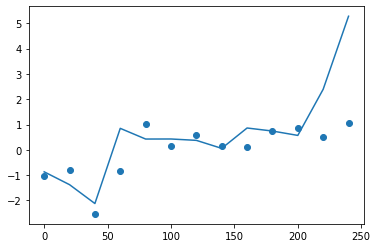

In [160]:
plt.plot(x,m_a.predict(x)[0])
plt.scatter(x,yhat)

In [53]:
def Cov(x1, x2, l=1.0, sigma_f=1.0):
    m, n = x1.shape[0], x2.shape[0]
    dist_matrix = np.zeros((m, n), dtype=float)
    for i in range(m):
        for j in range(n):
            dist_matrix[i][j] = np.sum((x1[i] - x2[j])**2)
    return sigma_f**2 * np.exp(-0.5 / l**2 * dist_matrix)

def Cov2(x1, x2, l=1.0, sigma_f=1.0):
    dist_matrix = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * dist_matrix)

In [143]:
for num_layers in range(len(m_a.layers)):
    K = Cov2(m_a.layers[num_layers].parameters[0], m_a.layers[num_layers].parameters[0], \
                    l=m_a.layers[num_layers].parameters[1][1], sigma_f=m_a.layers[num_layers].parameters[1][0])
    print(np.linalg.eigvals(K).max())

0.0012867536955546025


In [55]:
def rmse(predictions, targets):
    return np.sqrt(((predictions.flatten() - targets.flatten()) ** 2).mean())

In [56]:
Y_pred = m.predict(x)[0]
Y_pred_s = m.predict_withSamples(x, nSamples=10)[0]

In [101]:
print(rmse(Y_pred,x))
print(rmse(Y_pred_s,x))

1.5210038041597347
1.5066634694731444


In [61]:
layers = [1 for i in range(20)]

kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i,ARD=False,lengthscale = None)]
m = deepgp.DeepGP(layers,Y=y, X=x, 
                  inits=inits, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=len(x), back_constraint=False,lengthscale = 2)

In [62]:

for i in range(len(m.layers)):
    output_var = m.layers[i].Y.var() if i==0 else m.layers[i].Y.mean.var()
    m.layers[i].Gaussian_noise.variance = output_var*0
#     if i== 4:
#         m.layers[i].fix()
    m.layers[i].Gaussian_noise.variance.fix()
#     m.layers[i].kern.lengthscale.fix()

In [63]:
m.optimize(max_iters=5000, messages=True)

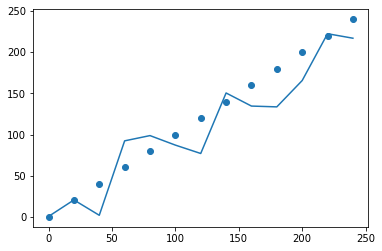

In [64]:
plt.plot(x,m.predict(x)[0])
plt.scatter(x,x)

In [65]:
for num_layers in range(len(m.layers)):
    if num_layers>0:
        K = Cov2(m.layers[num_layers].parameters[0], m.layers[num_layers].parameters[0], \
                    l=m.layers[num_layers].parameters[1][1], sigma_f=m.layers[num_layers].parameters[1][0])
        print(np.linalg.eigvals(K).max())

(18704.673710161886+0j)
2173.4393876394265
133.8458179082703
2.856314904405197
0.2606850543230408
1.101473098888958
1.043900835728077
0.27898767670288227
1.196876527879377
1.9991715967038282
0.361238007985358
0.7212377616468076
3.656621420242277
2.1686698626307703
0.7345073186727769
0.30647033617176006
0.06345865840373491
8.14845778251173


In [66]:
def rmse(predictions, targets):
    return np.sqrt(((predictions.flatten() - targets.flatten()) ** 2).mean())
Y_pred = m.predict(x)[0]
Y_pred_s = m.predict_withSamples(x, nSamples=10)[0]
print(rmse(Y_pred,x))
print(rmse(Y_pred_s,x))

27.011288187513216
23.909595764294497


In [67]:
layers = [1 for i in range(20)]

kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i,ARD=False,lengthscale = None)]
m = deepgp.DeepGP(layers,Y=x, X=x, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=len(x), back_constraint=False,lengthscale = 2)

In [68]:

for i in range(len(m.layers)):
    output_var = m.layers[i].Y.var() if i==0 else m.layers[i].Y.mean.var()
    m.layers[i].Gaussian_noise.variance = output_var*0
#     if i== 4:
#         m.layers[i].fix()
    m.layers[i].Gaussian_noise.variance.fix()
#     m.layers[i].kern.lengthscale.fix()

In [69]:
m.optimize(max_iters=5000, messages=True)

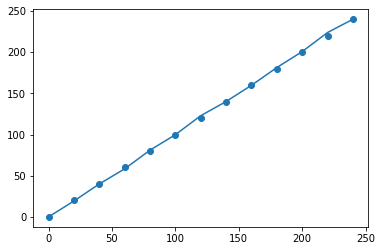

In [70]:
plt.plot(x,m.predict(x)[0])
plt.scatter(x,x)

In [71]:
for num_layers in range(len(m.layers)):
    if num_layers>0:
        K = Cov2(m.layers[num_layers].parameters[0], m.layers[num_layers].parameters[0], \
                    l=m.layers[num_layers].parameters[1][1], sigma_f=m.layers[num_layers].parameters[1][0])
        print(np.linalg.eigvals(K).max())

19848.364731832084
5774.098030866124
721.4830629810644
83.46270545787071
18.85176717632514
3.880472091966159
0.8964679847630252
1.1545561171298748
1.0754272527132134
15.22337008361406
5.2865019318768
1.8473112371686407
17.7401257038068
29.853560637083234
3.7299735035821913
1.5567477282927278
38.18329827083029
31.034646109695537


In [72]:
def rmse(predictions, targets):
    return np.sqrt(((predictions.flatten() - targets.flatten()) ** 2).mean())
Y_pred = m.predict(x)[0]
Y_pred_s = m.predict_withSamples(x, nSamples=10)[0]
print(rmse(Y_pred,x))
print(rmse(Y_pred_s,x))

1.5210038041597347
1.5066634694731444


In [73]:
layers = [1 for i in range(20)]

kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i,ARD=False,lengthscale = None)]
m = deepgp.DeepGP(layers,Y=x, X=x, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=len(x), back_constraint=False,lengthscale = 2)

for i in range(len(m.layers)):
    output_var = m.layers[i].Y.var() if i==0 else m.layers[i].Y.mean.var()
    m.layers[i].Gaussian_noise.variance = output_var*0
#     if i== 4:
#         m.layers[i].fix()
    m.layers[i].Gaussian_noise.variance.fix()
#     m.layers[i].kern.lengthscale.fix()

In [84]:
m.optimize(max_iters=200, messages=True)

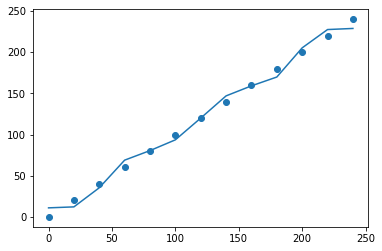

In [38]:
plt.plot(x,m.predict(x)[0])
plt.scatter(x,x)

In [85]:
for num_layers in range(len(m.layers)):
    if num_layers>0:
        K = Cov2(m.layers[num_layers].parameters[0], m.layers[num_layers].parameters[0], \
                    l=m.layers[num_layers].parameters[1][1], sigma_f=m.layers[num_layers].parameters[1][0])
        print(np.linalg.eigvals(K).max())

(1.9872126252930695+0j)
5.972175528753739
5.494712047519954
5.270523957094616
5.63622371749447
5.6443881488008625
5.481644568821282
5.553915713066255
5.670313473046874
5.699413688337866
5.516023637620062
5.4025317115414975
5.649642227034941
5.67511752752117
5.660584305298689
5.550731739009542
6.174668756525666
0.9998041401524822


In [76]:
m.layers[1].parameters[0]

index,deepgp.layer_1.inducing_inputs,constraints,priors
[0 0],0.26726145,,
[1 0],-0.53452217,,
[2 0],-1.06904493,,
[3 0],-1.33630746,,
[4 0],1.60358584,,
[5 0],-0.00000000,,
[6 0],0.53452222,,
[7 0],1.33630711,,
[8 0],-1.60358376,,
[9 0],0.80178426,,


In [77]:
m.layers[2].parameters[0]

index,deepgp.layer_2.inducing_inputs,constraints,priors
[0 0],-0.26726149,,
[1 0],1.06904527,,
[2 0],0.80178413,,
[3 0],-1.60358481,,
[4 0],0.26726144,,
[5 0],-1.33630717,,
[6 0],-1.06904515,,
[7 0],0.00000004,,
[8 0],0.53452225,,
[9 0],1.33630688,,
